In [1]:
!pip install pandas numpy seaborn matplotlib scikit-learn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)

   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---

In [2]:
import pandas as pd


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [12]:
data = pd.read_csv('imdb_india_movies.csv', encoding='latin-1')


In [11]:
print(data.head())
print(data.columns)


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [10]:
import pandas as pd


data = pd.read_csv('imdb_india_movies.csv', encoding='latin-1')


print(data.head())
print(data.columns)


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [13]:
print(data.columns)


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [8]:
target_column = 'Rating'  


In [14]:
data = data.dropna(subset=[target_column])
y = data[target_column]


In [15]:

for col in ['IMDB_Rating', 'Rating', 'imdb_rating']:
    if col in data.columns:
        target_column = col
        break
else:
    raise ValueError("Target column (IMDB rating) not found in dataset!")

print(f"Target column detected: {target_column}")

data = data.dropna(subset=[target_column])


Target column detected: Rating


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
file_path = 'imdb_india_movies.csv'  
data = pd.read_csv(file_path, encoding='latin-1', on_bad_lines='skip')


print("\n Dataset Loaded Successfully!")
print("Columns in Dataset:", data.columns.tolist())
print("First 5 rows:\n", data.head())


 Dataset Loaded Successfully!
Columns in Dataset: ['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
First 5 rows:
                                  Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN 

In [17]:
target_column = None
for col in ['IMDB_Rating', 'Rating', 'imdb_rating']:
    if col in data.columns:
        target_column = col
        break

if not target_column:
    raise ValueError("Target column (IMDB rating) not found in dataset!")

print(f"\n Target Column Detected: {target_column}")


 Target Column Detected: Rating


In [20]:
columns_to_drop = ['Name', 'Director', 'Actors']
data.drop([col for col in columns_to_drop if col in data.columns], axis=1, inplace=True)

In [21]:
data = data.dropna(subset=[target_column])

data.fillna(data.median(numeric_only=True), inplace=True)

In [28]:
categorical_cols = data.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(f"Encoding Categorical Columns: {list(categorical_cols)}")
    le = LabelEncoder()
    for col in categorical_cols:
        data[col] = le.fit_transform(data[col].astype(str))

Encoding Categorical Columns: ['Year', 'Duration', 'Genre', 'Votes', 'Actor 1', 'Actor 2', 'Actor 3']


In [29]:
X = data.drop(columns=[target_column])
y = data[target_column]

print("\n Features used:", X.columns.tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Features used: ['Year', 'Duration', 'Genre', 'Votes', 'Actor 1', 'Actor 2', 'Actor 3']


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [31]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n  Model Evaluation:")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")


  Model Evaluation:
Root Mean Squared Error: 1.317008955203458
R² Score: 0.06703755926950283


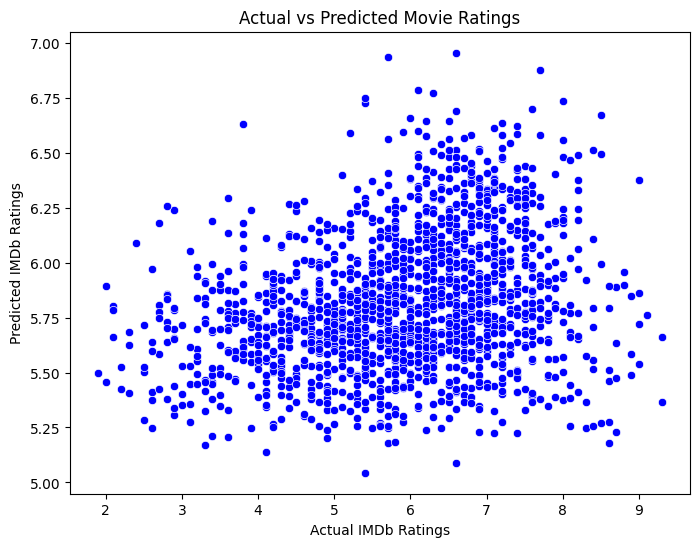

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel("Actual IMDb Ratings")
plt.ylabel("Predicted IMDb Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()